In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image


In [2]:
train_dir = '/content/drive/MyDrive/Fruit_Detection/train'
test_dir = '/content/drive/MyDrive/Fruit_Detection/test'


In [3]:
import os
import shutil

def move_images_to_fruit_folders(subfolder):
    main_folder = 'path/to/your/main/folder'
    subfolder_path = os.path.join(main_folder, subfolder)

    # Remove .xml files
    for file in os.listdir(subfolder_path):
        if file.endswith('.xml'):
            os.remove(os.path.join(subfolder_path, file))

    # Create fruit folders
    fruits = ['apple', 'orange', 'banana', 'mixed']
    for fruit in fruits:
        fruit_path = os.path.join(subfolder_path, fruit)
        if not os.path.exists(fruit_path):
            os.makedirs(fruit_path)

    # Move images to the respective fruit folders
    for file in os.listdir(subfolder_path):
        if file.endswith('.jpg') or file.endswith('.jpeg'):
            fruit_prefix = file.split('_')[0].lower()
            if fruit_prefix in fruits:
                src = os.path.join(subfolder_path, file)
                dest = os.path.join(subfolder_path, fruit_prefix, file)
                shutil.move(src, dest)

# Move images in train and test subfolders
move_images_to_fruit_folders(train_dir)
move_images_to_fruit_folders(test_dir)


In [3]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
path = train_dir

data_dir = pathlib.Path(path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['apple' 'banana' 'mixed' 'orange']


In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (768, 1366, 3)


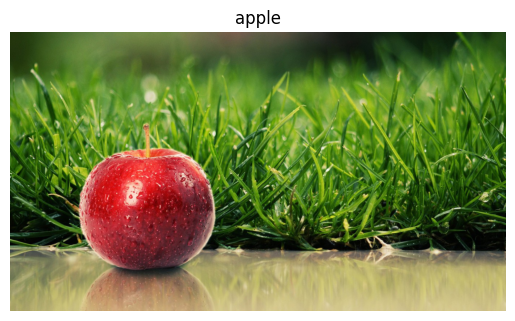

In [5]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,
                        target_class="apple")

Image shape: (2850, 2850, 3)
Image shape: (300, 271, 3)
Image shape: (1200, 1600, 3)
Image shape: (470, 450, 3)


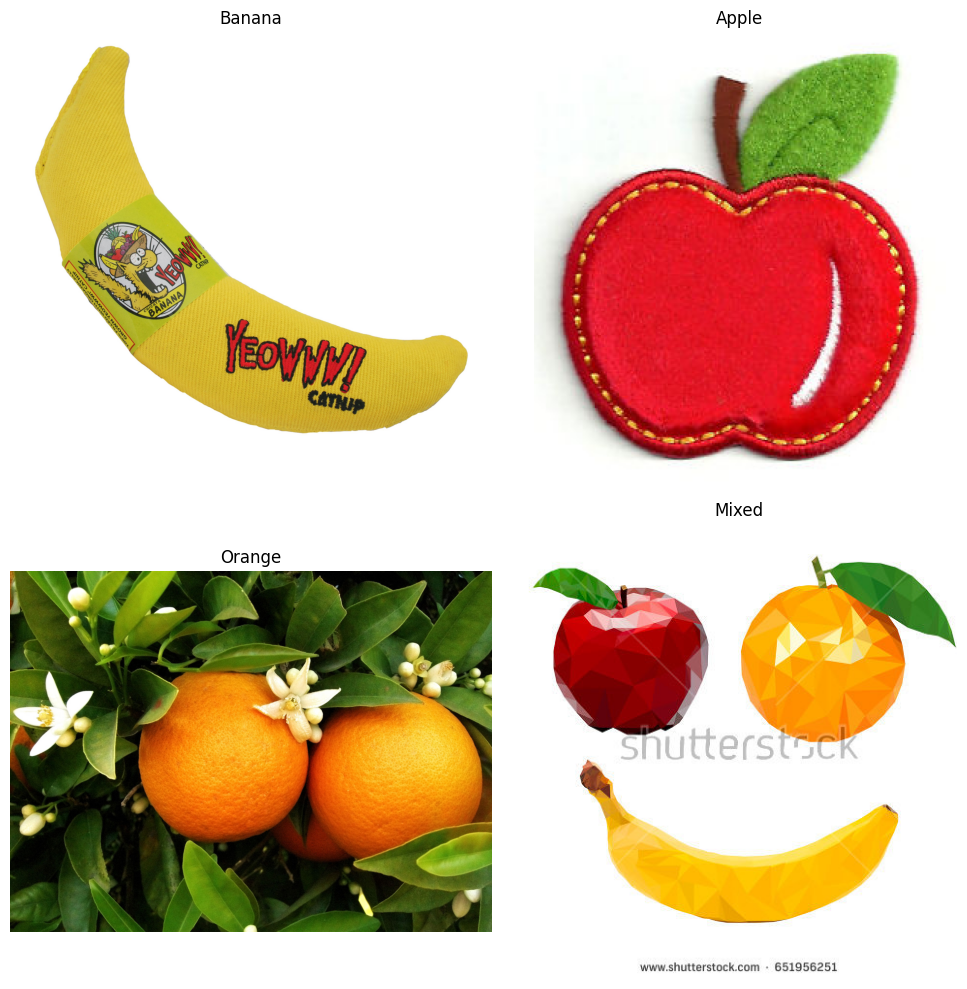

In [6]:
# Visualize data (requires function 'view_random_image' above)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
banana_img = view_random_image(train_dir, "banana")
plt.title("Banana")

plt.subplot(2, 2, 2)
apple_img = view_random_image(train_dir, "apple")
plt.title("Apple")

plt.subplot(2, 2, 3)
orange_img = view_random_image(train_dir, "orange")
plt.title("Orange")

plt.subplot(2, 2, 4)
mixed_img = view_random_image(train_dir, "mixed")
plt.title("Mixed")

plt.tight_layout()
plt.show()


In [ ]:
# # View a random image from the training dataset

# target_dir = '/content/drive/MyDrive/Fruit_Detection/train'
# img = view_random_image(target_dir)

In [7]:
# View the image shape
img.shape # returns (width, height, colour channels)

(768, 1366, 3)

In [8]:
!ls /content/drive/MyDrive/Fruit_Detection/train/apple


apple_10.jpg  apple_24.jpg  apple_39.jpg  apple_52.jpg	apple_66.jpg
apple_11.jpg  apple_25.jpg  apple_3.jpg   apple_53.jpg	apple_67.jpg
apple_12.jpg  apple_26.jpg  apple_40.jpg  apple_54.jpg	apple_68.jpg
apple_13.jpg  apple_27.jpg  apple_41.jpg  apple_55.jpg	apple_69.jpg
apple_14.jpg  apple_28.jpg  apple_42.jpg  apple_56.jpg	apple_6.jpg
apple_15.jpg  apple_29.jpg  apple_43.jpg  apple_57.jpg	apple_70.jpg
apple_16.jpg  apple_2.jpg   apple_44.jpg  apple_58.jpg	apple_71.jpg
apple_17.jpg  apple_30.jpg  apple_45.jpg  apple_59.jpg	apple_72.jpg
apple_18.jpg  apple_31.jpg  apple_46.jpg  apple_5.jpg	apple_73.jpg
apple_19.jpg  apple_32.jpg  apple_47.jpg  apple_60.jpg	apple_74.jpg
apple_1.jpg   apple_33.jpg  apple_48.jpg  apple_61.jpg	apple_75.jpg
apple_20.jpg  apple_35.jpg  apple_49.jpg  apple_62.jpg	apple_76.jpg
apple_21.jpg  apple_36.jpg  apple_4.jpg   apple_63.jpg	apple_7.jpg
apple_22.jpg  apple_37.jpg  apple_50.jpg  apple_64.jpg	apple_8.jpg
apple_23.jpg  apple_38.jpg  apple_51.jpg  apple_65.j

In [55]:
!ls /content/drive/MyDrive/Fruit_Detection/test



apple_77.jpg  apple_89.jpg   banana_82.jpg  banana_94.jpg  orange_83.jpg
apple_78.jpg  apple_90.jpg   banana_83.jpg  mixed_21.jpg   orange_84.jpg
apple_79.jpg  apple_91.jpg   banana_84.jpg  mixed_22.jpg   orange_85.jpg
apple_80.jpg  apple_92.jpg   banana_85.jpg  mixed_23.jpg   orange_86.jpg
apple_81.jpg  apple_93.jpg   banana_86.jpg  mixed_24.jpg   orange_87.jpg
apple_82.jpg  apple_94.jpg   banana_87.jpg  mixed_25.jpg   orange_89.jpg
apple_83.jpg  apple_95.jpg   banana_88.jpg  orange_77.jpg  orange_90.jpg
apple_84.jpg  banana_77.jpg  banana_89.jpg  orange_78.jpg  orange_91.jpg
apple_85.jpg  banana_78.jpg  banana_90.jpg  orange_79.jpg  orange_92.jpg
apple_86.jpg  banana_79.jpg  banana_91.jpg  orange_80.jpg  orange_93.jpg
apple_87.jpg  banana_80.jpg  banana_92.jpg  orange_81.jpg  orange_94.jpg
apple_88.jpg  banana_81.jpg  banana_93.jpg  orange_82.jpg  orange_95.jpg


In [6]:
import os
import shutil

def remove_ipynb_checkpoints(folder):
    for root, dirs, _ in os.walk(folder):
        if '.ipynb_checkpoints' in dirs:
            checkpoints_path = os.path.join(root, '.ipynb_checkpoints')
            shutil.rmtree(checkpoints_path)
            print(f'Removed: {checkpoints_path}')

# Replace 'your/folder/path' with the path to the folder where you want to delete the .ipynb_checkpoints
remove_ipynb_checkpoints(train_dir)
remove_ipynb_checkpoints(test_dir)


Removed: /content/drive/MyDrive/Fruit_Detection/train/.ipynb_checkpoints
Removed: /content/drive/MyDrive/Fruit_Detection/test/.ipynb_checkpoints


In [9]:
import os

# Path to the folder in your Google Drive
path = "/content/drive/MyDrive/Fruit_Detection"

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Fruit_Detection'.
There are 4 directories and 0 images in '/content/drive/MyDrive/Fruit_Detection/test'.
There are 0 directories and 19 images in '/content/drive/MyDrive/Fruit_Detection/test/apple'.
There are 0 directories and 18 images in '/content/drive/MyDrive/Fruit_Detection/test/orange'.
There are 0 directories and 18 images in '/content/drive/MyDrive/Fruit_Detection/test/banana'.
There are 0 directories and 5 images in '/content/drive/MyDrive/Fruit_Detection/test/mixed'.
There are 4 directories and 0 images in '/content/drive/MyDrive/Fruit_Detection/train'.
There are 0 directories and 75 images in '/content/drive/MyDrive/Fruit_Detection/train/apple'.
There are 0 directories and 76 images in '/content/drive/MyDrive/Fruit_Detection/train/orange'.
There are 0 directories and 73 images in '/content/drive/MyDrive/Fruit_Detection/train/banana'.
There are 0 directories and 20 images in '/content/drive/MyDrive/Fruit_Detectio

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [12]:
batch_size = 32
target_size = (150, 150)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 244 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [13]:
train_generator.num_classes

4

In [14]:
def generator_wrapper(gen):
    for data, labels in gen:
        yield (data, labels)

train_dataset = tf.data.Dataset.from_generator(
    lambda: generator_wrapper(train_generator),
    output_signature=(
        tf.TensorSpec(shape=(None, *target_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
    )
).prefetch(tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_generator(
    lambda: generator_wrapper(test_generator),
    output_signature=(
        tf.TensorSpec(shape=(None, *target_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, test_generator.num_classes), dtype=tf.float32)
    )
).prefetch(tf.data.experimental.AUTOTUNE)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
epochs = 25
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_dataset,
    validation_steps=len(test_generator)
)


Epoch 1/25
5/8 [=================>............] - ETA: 35s - loss: 1.3971 - accuracy: 0.2875

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - 123s 15s/step - loss: 1.3780 - accuracy: 0.3361 - val_loss: 1.2308 - val_accuracy: 0.4167
Epoch 2/25
8/8 [==============================] - 19s 2s/step - loss: 1.1609 - accuracy: 0.5656 - val_loss: 1.2029 - val_accuracy: 0.5000
Epoch 3/25
8/8 [==============================] - 20s 3s/step - loss: 0.9871 - accuracy: 0.5779 - val_loss: 0.8804 - val_accuracy: 0.6833
Epoch 4/25
8/8 [==============================] - 21s 3s/step - loss: 0.7160 - accuracy: 0.7090 - val_loss: 0.5926 - val_accuracy: 0.8000
Epoch 5/25
8/8 [==============================] - 20s 3s/step - loss: 0.5577 - accuracy: 0.8361 - val_loss: 0.4746 - val_accuracy: 0.8667
Epoch 6/25
8/8 [==============================] - 21s 3s/step - loss: 0.4416 - accuracy: 0.8566 - val_loss: 0.4498 - val_accuracy: 0.8667
Epoch 7/25
8/8 [==============================] - 20s 3s/step - loss: 0.4829 - accuracy: 0.8484 - val_loss: 0.3930 - val_accuracy: 0.9000
Epoch 8/25
8/8 [===========================

In [19]:
test_loss, test_acc = model.evaluate(test_dataset, steps=len(test_generator))
print('Test accuracy:', test_acc)


2/2 [==============================] - 2s 1s/step - loss: 0.3992 - accuracy: 0.9000
Test accuracy: 0.8999999761581421


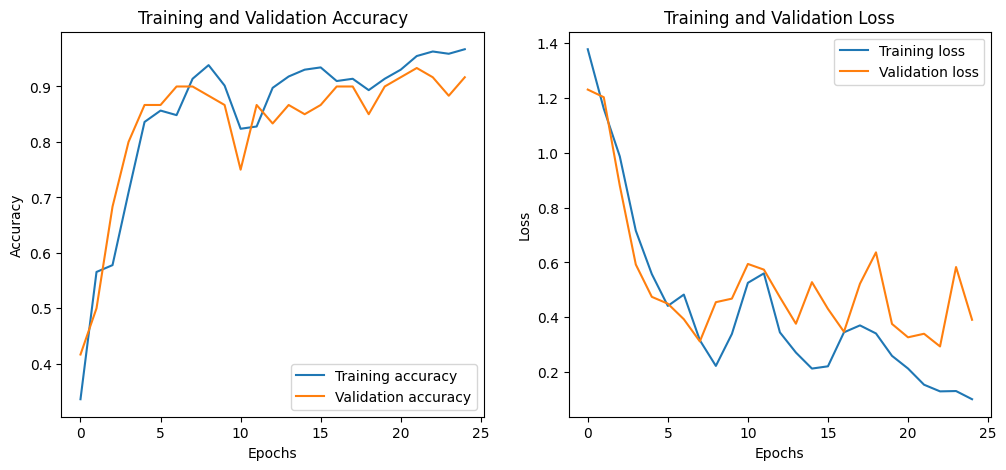

In [20]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


2/2 [==============================] - 2s 719ms/step


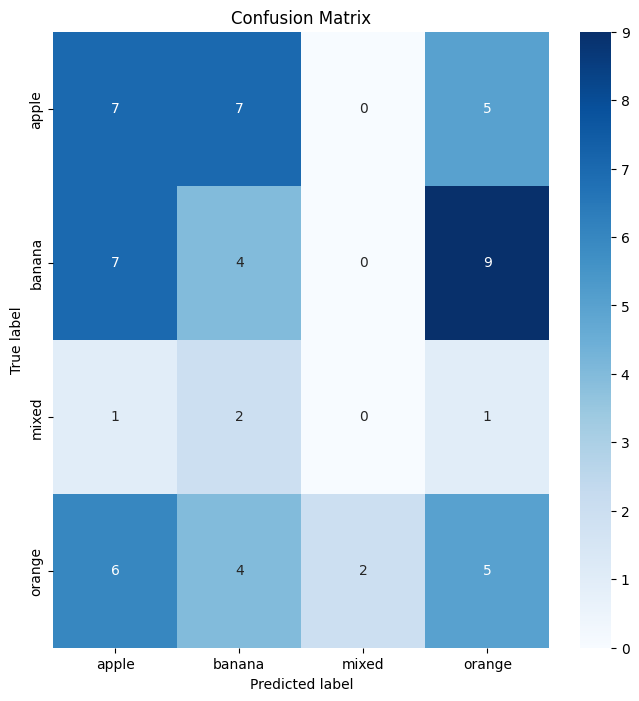

In [21]:
# Get the predicted labels
y_pred = np.argmax(model.predict(test_dataset, steps=len(test_generator)), axis=1)

# Get the true labels
y_true = np.array([])
for _, labels in test_generator:
    y_true = np.append(y_true, np.argmax(labels, axis=1))
    if len(y_true) >= test_generator.samples:
        break

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


1/1 [==============================] - 0s 57ms/step


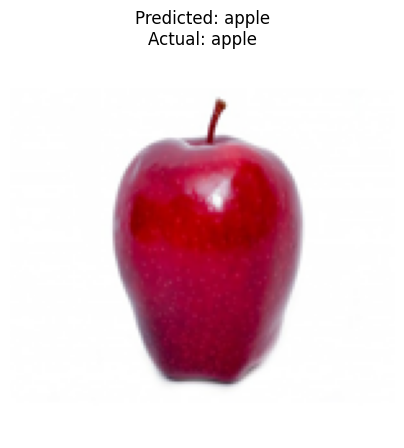

In [30]:
import random
from PIL import Image

def predict_random_image(model, test_dir, test_generator, target_size=(150, 150)):
    # Select a random fruit subfolder
    fruit_folders = os.listdir(test_dir)
    random_fruit = random.choice(fruit_folders)

    # Select a random image from the chosen fruit subfolder
    fruit_folder_path = os.path.join(test_dir, random_fruit)
    image_files = [f for f in os.listdir(fruit_folder_path) if f.endswith(('.jpg', '.jpeg'))]
    random_image = random.choice(image_files)
    image_path = os.path.join(fruit_folder_path, random_image)

    # Load and preprocess the image
    image = Image.open(image_path).resize(target_size)
    image_array = np.array(image) / 255.0
    image_batch = np.expand_dims(image_array, axis=0)

    # Make a prediction using the model
    prediction = model.predict(image_batch)
    predicted_label = np.argmax(prediction, axis=1)[0]

    # Get the actual label
    actual_label = test_generator.class_indices[random_fruit]

    # Display the prediction label, the actual label, and the testing image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f'Predicted: {list(test_generator.class_indices.keys())[predicted_label]}\n'
              f'Actual: {random_fruit}')
    plt.axis('off')
    plt.show()

# Use the function with the trained model
predict_random_image(model, test_dir, test_generator)


1/1 [==============================] - 0s 79ms/step


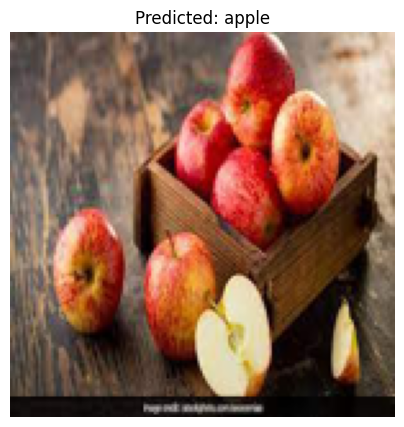

In [39]:
def predict_image_from_path(model, image_path, test_generator, target_size=(150, 150)):
    # Get the actual fruit name from the image path
    actual_fruit = os.path.basename(os.path.dirname(image_path))

    # Load and preprocess the image
    image = Image.open(image_path).resize(target_size)
    image_array = np.array(image) / 255.0
    image_batch = np.expand_dims(image_array, axis=0)

    # Make a prediction using the model
    prediction = model.predict(image_batch)
    predicted_label = np.argmax(prediction, axis=1)[0]
    predicted_fruit = list(test_generator.class_indices.keys())[predicted_label]

    # Display the prediction label, the actual label, and the testing image
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_fruit}')
    plt.axis('off')
    plt.show()

# Example usage:
image_path1 = '/content/apple1).jpg'
image_path2 = "/content/banana-herb-berry-16.jpg"
image_path3 = "/content/orangjpg.jpg"
predict_image_from_path(model, image_path1, test_generator)


In [60]:
import os
import glob
import shutil
import random
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Pre-process the images and remove .xml files
def remove_xml_files(folder):
    xml_files = glob.glob(os.path.join(folder, "*.xml"))
    for file in xml_files:
        os.remove(file)

remove_xml_files(train_dir)
remove_xml_files(test_dir)



In [42]:
import os
import glob

def create_class_subdirectories(folder):
    for fruit in ["Apple", "Banana", "Orange", "Mixed"]:
        if not os.path.exists(os.path.join(folder, fruit)):
            os.makedirs(os.path.join(folder, fruit))

def move_images_to_subdirectories(folder):
    for fruit in ["Apple", "Banana", "Orange", "Mixed"]:
        images = glob.glob(os.path.join(folder, f"{fruit}_*.jpeg"))
        for image in images:
            shutil.move(image, os.path.join(folder, fruit, os.path.basename(image)))

create_class_subdirectories(train_dir)
create_class_subdirectories(test_dir)

move_images_to_subdirectories(train_dir)
move_images_to_subdirectories(test_dir)
